<a href="https://colab.research.google.com/github/LucaSoames/EGH455/blob/main/models/YoloV5_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://docs.luxonis.com/images/depthai_logo.png" width="500">

# DepthAI Tutorial: Training and deployment of a YoloV5 model for object detection

![](https://img.shields.io/badge/DepthAI-2.9.0.0-lightgrey) ![](https://img.shields.io/badge/OpenVINO-2021.4-blue)

Welcome to DepthAI!

This tutorial will include comments near code for easier understanding and will cover:
* downloading the YoloV5 model from [ultralytics/yolov5](https://github.com/ultralytics/yolov5),
* initialization of the model with a pretrained version,
* training and validation on SKU-110K data set ,
* converting the model to blob using [tools.luxonis.com](http://tools.luxonis.com)
* converting the model manually

This model can run on our DepthAI Myriad X modules.
You can make a copy of this tutorial: File -> Save a copy in Drive

*Note:* In this tutorial, we will train the model on a SKU-110k. If you wish to create your own data set, you are welcome to follow the first three steps on [YoloV5 official tutorial](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data), as you will have to create a *.yaml* file. Luckily, YoloV5 comes with some pre-existing YAMLs, which you can find in the [data directory](https://github.com/ultralytics/yolov5/tree/master/data).

## Pre-requisites

Clone YoloV5 repository to the working directory.

In [1]:
%cd /content/
! git clone https://github.com/ultralytics/yolov5.git

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.


Install the required dependencies.

In [2]:
!pip install -U -r yolov5/requirements.txt  # install dependencies

  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)


In [3]:
%cd yolov5/

/content/yolov5


## Dataset preparation

If you are using a custom dataset, you will have to prepare your dataset for training, as stated in the first 3 steps on [YoloV5 Wiki](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data#train-on-custom-data). Once you have set up YAML and sorted labels and images into the right directories, you can continue with the next step.

Luckily, we are using SKU-110K, for which YAML already exists. If you inspect the [YAML](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml), you can see that there is also code for downloading and preprocessing of the dataset, so that it satisfies the required file structure. This code is automatically executed when we run the train.py and the dataset is not yet downloaded.

## Training

Before we begin the training, we have to choose the pretrained model. This image from YoloV5 documentation quickly summarizes them. You can find more about the models [here](https://github.com/ultralytics/yolov5#pretrained-checkpoints).

![YoloV5 Models](https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png)

We select the YOLOv5s as it is one of the smallest and quickest. You can also experiment with heavier models, but it might affect the FPS on Oak-D devices. For example, I get 15-18 FPS using YOLOv5s on my Oak-D device.

Script provided for training the model *train.py* has a lot of settable parameters which you can see below. We will use *weights, data, epochs, batch*, and *img*, but you can also use others such as *freeze*.

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Yg0BQvifINgpEz0Z2JI3")
project = rf.workspace("egh455-tblnn").project("egh455-jtll2-bvooc")
version = project.version(4)
dataset = version.download("yolov5")

! python train.py -h

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.


Extracting Dataset Version Zip to EGH455-4 in yolov5pytorch:: 100%|██████████| 11284/11284 [00:02<00:00, 5411.79it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-08-28 12:05:57.828000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756382757.847948    1929 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756382757.853924    1929 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

Before training we can also launch the TensorBoard, that will allow us to inspect the training.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train

We will set image size *img* to 416. We will train the model with *batch* size of 32 for 1 *epochs*. We set *data* to SKU-110K.yaml and provide the inital checkpoint *weights* to previously selected yolov5s.pt, which will be downloaded automatically.

For the real training, *epochs* should be higher (typically between 300-1000 epochs).

In [1]:
! python train.py --img 640 --batch 32 --epochs 400 --data /content/yolov5/EGH455-4/data.yaml --weights yolov5s.pt --device 0

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


*Note that we ignore the corrupted JPG warnings, as this tutorial serves for demonstration purposes.*

## Validation

After training our model, we can validate it on the validation set of our dataset.

In [9]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/yolov5/EGH455-4/data.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/EGH455-4/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/EGH455-4/valid/labels.cache... 218 images, 43 backgrounds, 0 corrupt: 100% 218/218 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:04<00:00,  1.44it/s]
                   all        218        275      0.812      0.102     0.0736     0.0171
          gauge_centre        218        100      0.248       0.41      0.237      0.055
            n

## Conversion & Deployment - recommended

After the training and validation, you can convert the fine-tuned PyTorch model to a `.blob` format so that you can deploy it on a device. For the model conversion we are going to use [tools.luxonis.com](http://tools.luxonis.com). This tool will convert the model for us (including the pruning).

Please follow these steps to do so:

1.   Download the fine-tuned weights from `./yolov5/runs/train/exp/weights/best.pt` to your device (as shown in screenshot below)
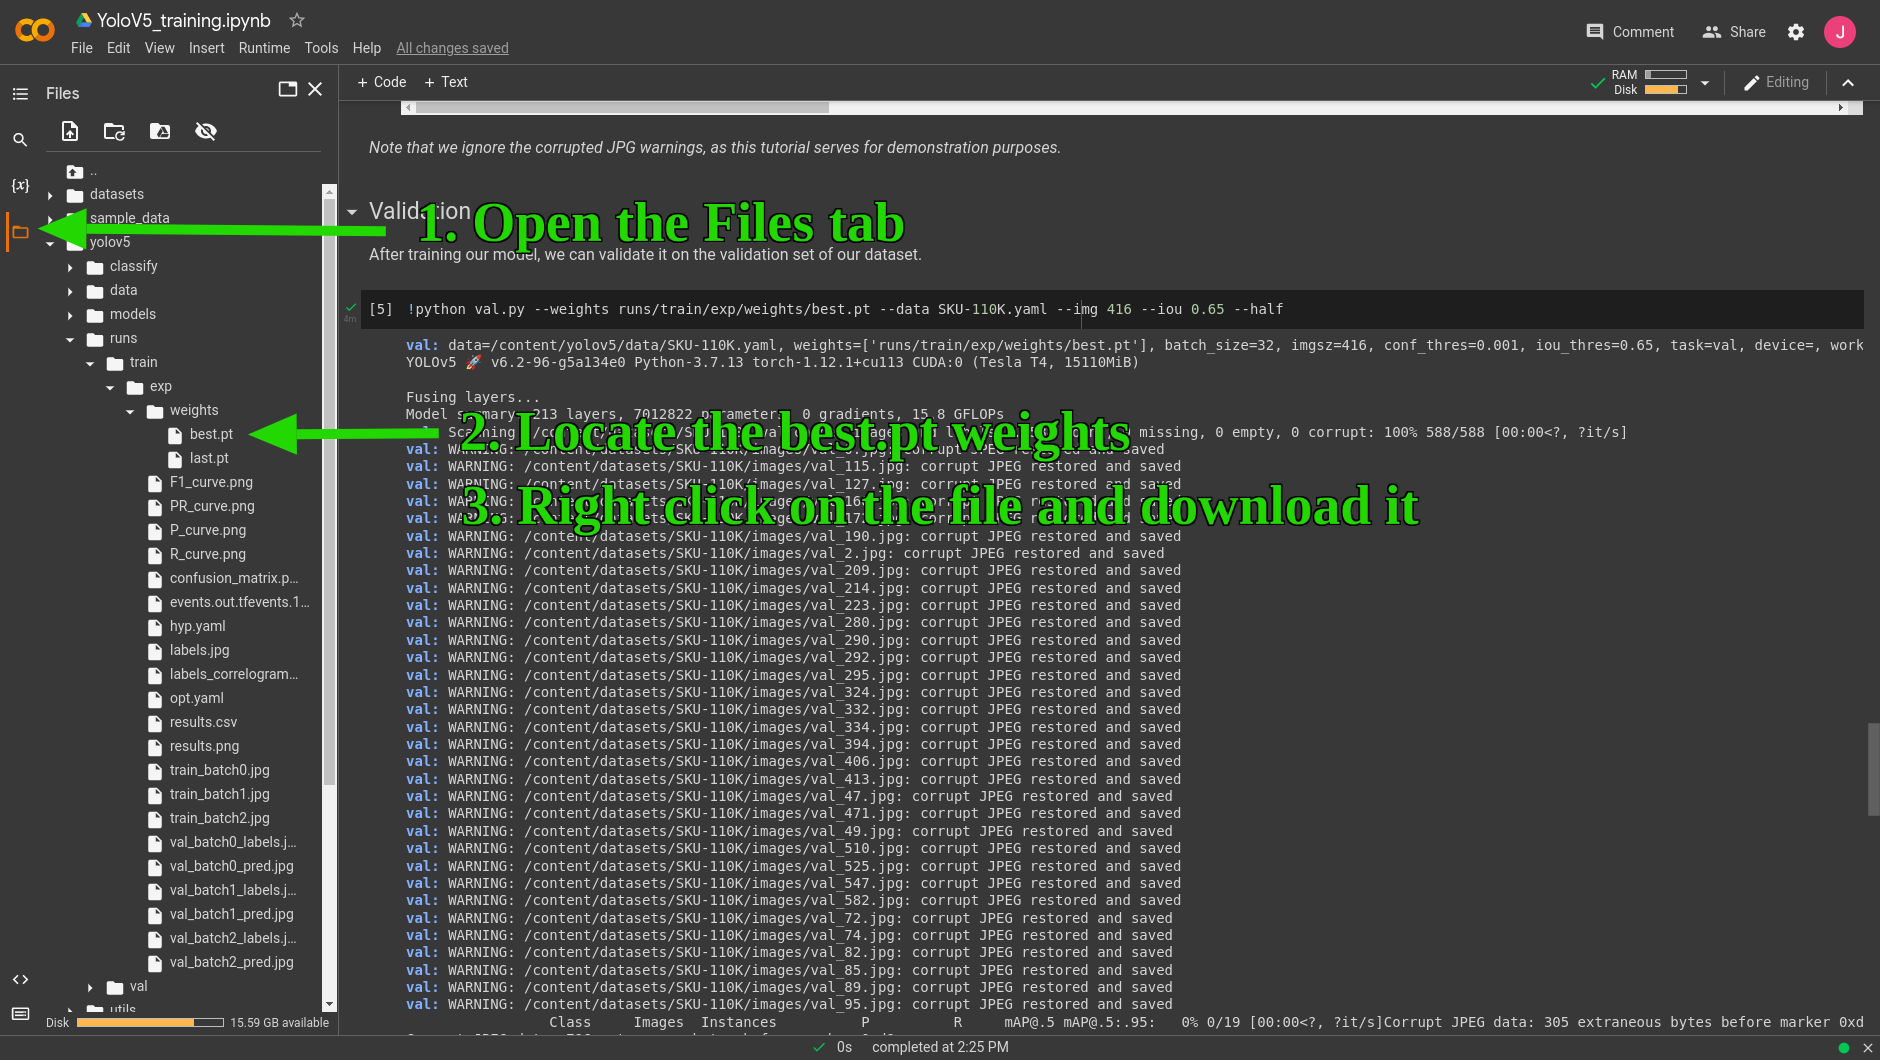
2.   Go to the page [tools.luxonis.com](http://tools.luxonis.com)
3.   On the page set `Yolo Version` to `YoloV5` (as shown in the screeenshot below)
4.   On the page set `File` to the downloaded `best.pt` weights (as shown in the screeenshot below)
5.   On the page set `Input shape` to `416` (as shown in the screeenshot below)
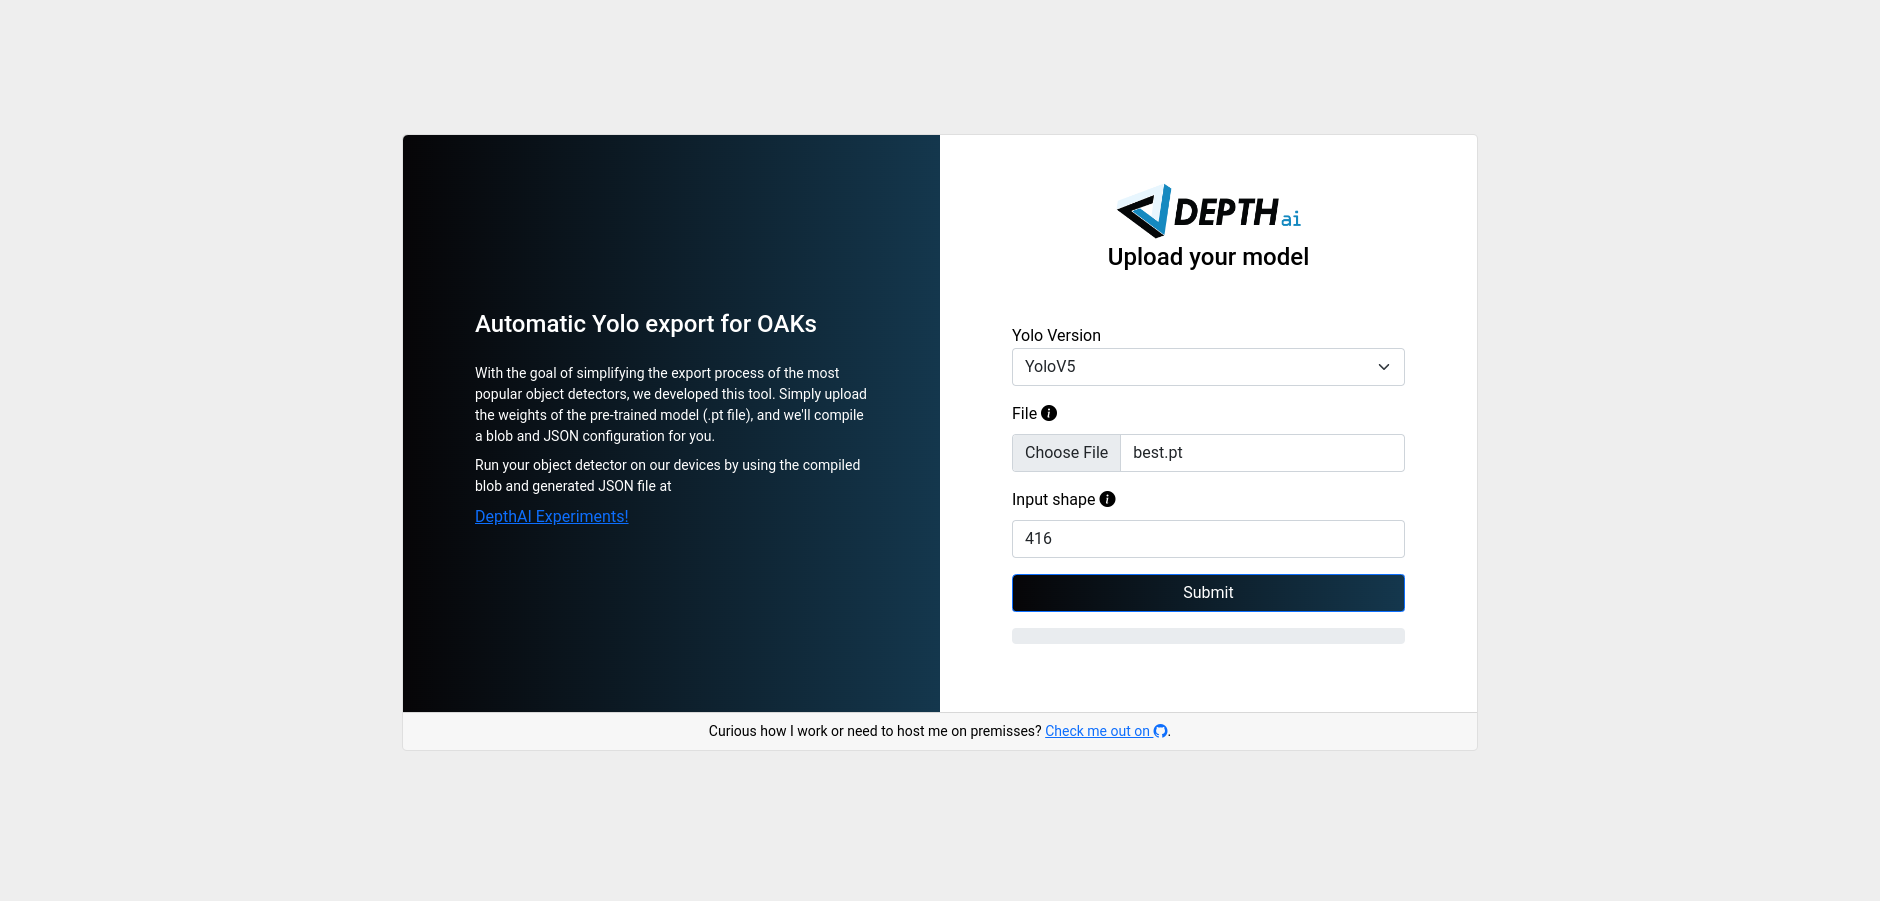
  



### Next steps

After the tool converts the model to the `blob`, it will compress the converted `blob` file alongside a corresponding `JSON` config file and intermediate `ONNX` and `OpenVINO` representations and automatically download the compressed folder.

The `JSON` config file contains the following parameters:
* *input_size* - input shape of the model,
* *num_classes* - number of classes that Yolo can detect *(1 in our case)*,
* *coordinates* - the size of coordinates *(4 by default)*,
* *anchors* - Yolo anchors *(located in [yolo] layer in CFG)*,
* *iou_threshold* - intersection over union threshold,
* *confidence_threshold* - confidence threshold above which objects are detected,
* *anchor_masks* - set the anchor masks as described in the next section,
* *labels* - labels of the objects that Yolo can detect.

To run the converted blob on an OAK device with on-device encoding, please visit the [depthai-experiments/gen2-yolo/device-decoding](https://github.com/luxonis/depthai-experiments/tree/master/gen2-yolo/device-decoding) repository. We provide the instructions in the README folder.


1.   Clone the repository using `git clone git@github.com:luxonis/depthai-experiments.git`
2.   Go to the `depthai-experiments/gen2-yolo/device-decoding/` folder
3.   Install the required dependencies using `https://github.com/luxonis/depthai-experiments/tree/master/gen2-yolo/device-decoding`
4.   Extract the downloaded folder and move the converted `blob` file and the config `JSON` file to the `depthai-experiments/gen2-yolo/device-decoding/` folder
5.   Run the app using `python3 main.py -m best_openvino_2021.4_6shave.blob -c best.json`






## Conversion & Deployment - manual (not recommended)

***Warning: We highly recommend using [tools.luxonis.com](http://tools.luxonis.com) to convert the model. It will do the conversion all by itself!***

In [ ]:
! pip install numpy==1.19.5 openvino==2021.4.2 openvino-dev==2021.4.2 onnxruntime==1.10.0

### ON-HOST DECODING of custom models

In this section we will show you how to prepare the model for on-host decoding.

#### Create ONNX

In [ ]:
%cd /content/yolov5/

In [ ]:
! python export.py --weights runs/train/exp/weights/best.pt --img 416 --batch 1 --device cpu --include "onnx" --simplify

#### Convert to OpenVINO

In [ ]:
! mo \
--input_model  /content/yolov5/runs/train/exp/weights/best.onnx \
--model_name yolov5s_sku \
--data_type FP16 \
--output_dir /content/output/ \
--input_shape [1,3,416,416] \
--reverse_input_channel \
--scale 255

#### Testing OpenVINO model

In [ ]:
import time
def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = torch.zeros_like(x) if isinstance(x, torch.Tensor) else np.zeros_like(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y


def non_max_suppression(prediction, conf_thres=0.1, iou_thres=0.6, merge=False, classes=None, agnostic=False):
    """Performs Non-Maximum Suppression (NMS) on inference results
    Returns:
         detections with shape: nx6 (x1, y1, x2, y2, conf, cls)
    """
    prediction=torch.from_numpy(prediction)
    if prediction.dtype is torch.float16:
        prediction = prediction.float()  # to FP32

    nc = prediction[0].shape[1] - 5  # number of classes
    xc = prediction[..., 4] > conf_thres  # candidates

    # Settings
    min_wh, max_wh = 2, 4096  # (pixels) minimum and maximum box width and height
    max_det = 300  # maximum number of detections per image
    time_limit = 10.0  # seconds to quit after
    redundant = True  # require redundant detections
    multi_label = nc > 1  # multiple labels per box (adds 0.5ms/img)

    t = time.time()
    output = [None] * prediction.shape[0]
    for xi, x in enumerate(prediction):  # image index, image inference
        # Apply constraints
        # x[((x[..., 2:4] < min_wh) | (x[..., 2:4] > max_wh)).any(1), 4] = 0  # width-height
        x = x[xc[xi]]  # confidence

        # If none remain process next image
        if not x.shape[0]:
            continue

        # Compute conf
        x[:, 5:] *= x[:, 4:5]  # conf = obj_conf * cls_conf

        # Box (center x, center y, width, height) to (x1, y1, x2, y2)
        box = xywh2xyxy(x[:, :4])

        # Detections matrix nx6 (xyxy, conf, cls)
        if multi_label:
            i, j = (x[:, 5:] > conf_thres).nonzero(as_tuple=False).T
            x = torch.cat((box[i], x[i, j + 5, None], j[:, None].float()), 1)
        else:  # best class only
            conf, j = x[:, 5:].max(1, keepdim=True)
            x = torch.cat((box, conf, j.float()), 1)[conf.view(-1) > conf_thres]

        # Filter by class
        if classes:
            x = x[(x[:, 5:6] == torch.tensor(classes, device=x.device)).any(1)]

        # Apply finite constraint
        # if not torch.isfinite(x).all():
        #     x = x[torch.isfinite(x).all(1)]

        # If none remain process next image
        n = x.shape[0]  # number of boxes
        if not n:
            continue

        # Sort by confidence
        # x = x[x[:, 4].argsort(descending=True)]

        # Batched NMS
        c = x[:, 5:6] * (0 if agnostic else max_wh)  # classes
        boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
        i = torchvision.ops.boxes.nms(boxes, scores, iou_thres)
        if i.shape[0] > max_det:  # limit detections
            i = i[:max_det]
        if merge and (1 < n < 3E3):  # Merge NMS (boxes merged using weighted mean)
            try:  # update boxes as boxes(i,4) = weights(i,n) * boxes(n,4)
                iou = box_iou(boxes[i], boxes) > iou_thres  # iou matrix
                weights = iou * scores[None]  # box weights
                x[i, :4] = torch.mm(weights, x[:, :4]).float() / weights.sum(1, keepdim=True)  # merged boxes
                if redundant:
                    i = i[iou.sum(1) > 1]  # require redundancy
            except:  # possible CUDA error https://github.com/ultralytics/yolov3/issues/1139
                print(x, i, x.shape, i.shape)
                pass

        output[xi] = x[i]
        if (time.time() - t) > time_limit:
            break  # time limit exceeded

    return output

In [ ]:
import numpy as np
import torchvision

def draw_boxes(frame, boxes, total_classes):
    for i in range(boxes.shape[0]):
      cv2.rectangle(frame, (int(boxes[i,0]), int(boxes[i,1])),
                    (int(boxes[i,2]), int(boxes[i,3])), (0,128,0) , 1)
    return frame

import torch
import cv2
import numpy as np
from openvino.inference_engine import IECore
import urllib.request
from google.colab.patches import cv2_imshow

model_xml = '/content/output/yolov5s_sku.xml'
model_bin = '/content/output/yolov5s_sku.bin'

TOTAL_CLASSES = 80

ie = IECore()
print("Available devices:", ie.available_devices)
net = ie.read_network(model=model_xml, weights=model_bin)
input_blob = next(iter(net.input_info))
# You can select device_name="CPU" to run on CPU
exec_net = ie.load_network(network=net, device_name='CPU')

# Image attribution Amnesiac86, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/a2/Faced_products_on_a_supermarket_shelf.JPG')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

#img = cv2.imread('/content/datasets/SKU-110K/images/test_0.jpg', cv2.IMREAD_COLOR)

#cv2_imshow(img)

raw_image = img
print(raw_image.shape)
image = cv2.resize(raw_image, (555, 416))
image = np.array(image)
image = image[0:416, 0:416, :]
print(image.shape)
cv2_imshow(image)
frame = image
image = image.astype(np.float32)
image = np.expand_dims(image, axis=0)
image = np.moveaxis(image, 3, -3)
#image = image / 255
print(image.shape)

output = exec_net.infer(inputs={input_blob: image})
import torch
print(output)
output = np.array(output["output"])

for i in range(0, output.shape[0]):
  boxes = non_max_suppression(output, conf_thres=0.1, iou_thres=0.4)
  boxes = np.array(boxes[0])
  print(np.unique(boxes[:,4], return_counts = True))
  frame = draw_boxes(frame, boxes, TOTAL_CLASSES)
  cv2_imshow(frame)

#### Generating the .blob file manually

We have tested the model, and we can see that the converted model works as expected.

If we can afford to do the decoding on the host, we can proceed with the generation of the blob from OpenVINO IR.

**However, we recommend on-device decoding, and for that we have to export the model a little bit differently. Please skip this section and continue with `ON-DEVICE DECODING`.**

In [ ]:
!pip install awscli --ignore-installed six

In [ ]:
# Choose the directory where you would like to save the blob.
blob_dir = "/content"

binfile = "/content/output/yolov5s_sku.bin"
xmlfile = "/content/output/yolov5s_sku.xml"

!python -m pip install blobconverter

import blobconverter
blob_path = blobconverter.from_openvino(
    xml=xmlfile,
    bin=binfile,
    data_type="FP16",
    shaves=6,
    version="2021.4"
)
from google.colab import files
files.download(blob_path)

#### Next steps - host decoding

After downloading the blob, you can test out your own model with [depthai-experiments/gen2-yolo/host-decoding](https://github.com/luxonis/depthai-experiments/tree/master/gen2-yolo/host-decoding) experiment. Simply place your .blob into the models directory.

Afterwards, you have to edit the following:
* `labelMap` to match your labels,
* `nn_shape` to match your input shape, and
* change the value `10647` in [lines 158-159](https://github.com/luxonis/depthai-experiments/blob/master/gen2-yolo/host-decoding/main.py#L158-L159) to `3 * ((IS/8)^2 + (IS/16)^2 + (IS/32)^2)`, where `IS = input shape`. You can calculate this in the next cell.

In [ ]:
IS = 416
int(3 * ((IS/8) ** 2 + (IS/16) ** 2 + (IS/32) ** 2))

### ON-DEVICE DECODING of custom models

In this section we will show you how to prepare the model for on-device decoding and explain the neccessary steps. We will:

*   load pretrained YoloV5 model,
*   export the pretrained model to ONNX format,
*   append operations to the nodes in the exported ONNX file,
*   prune the model and export it to OpenVINO IR,
*   generate blob that can run on OAK.




In [ ]:
%cd /content/yolov5/

Here we will export the pretrained model YoloV5m, a slightly heavier version than YoloV5s. It is aprroximately 30% slower, but has around 20% better mAP. We use a default model in order to show the conversion steps, without having to actually train the model.

This means that you can use any of the already available pre-trained models, your own custom model, or the model that we trained together in the previous steps.

Change the following cell accordingly:
*   **Pre-trained model**: to export an already available pre-trained model from Ultralytics, change the weights path to `yolov5X.pt`, where X denotes the version of the model. For example, we use `yolov5m.pt`, but you can also use `yolov5n.pt`, `yolov5s.pt`, etc.
*   **Model we trained in this tutorial**: to export the model that we trained in this tutorial, you should change the weights path to `runs/train/exp/weights/best.pt`. If you have not changed the default export path, the pre-trained weights should be located in this folder.
*   **Custom weights**: if you have a custom YoloV5 model that you trained with Ultralytics's YoloV5 repository, specify the relative path to your `.pt` file.

*Also be sure to set the correct image size when exporting to ONNX.*

In [ ]:
weights_path = "yolov5m.pt"

In [ ]:
! python export.py --weights $weights_path --img 416 --batch 1 --device cpu --include "onnx" --simplify

If export was succesful, you should see a message like
```
ONNX: export success, saved as yolov5m.onnx (84.9 MB)
...
Results saved to /content/yolov5
```

From this, you will be able to find your ONNX file. In our case, it is in /content/yolov5 and it is named yolov5m.onnx. So full path for our onnx model looks like:
`/content/yolov5/yolov5s.onnx`.

You will have to probably change it for the model you are exporting. Please do so in the cell after `onnx` library installation.

In [ ]:
!pip install onnx

**Set your path to the ONNX model here!**

In [ ]:
onnx_path = '/content/yolov5/yolov5m.onnx'

Now we will read and edit our ONNX model, but first let's talk a little bit about the structure of the YoloV5 model. Different to YoloV3/YoloV4 from our other tutorials, YoloV5 implementation already contains all the neccessary steps to compute the bounding boxes. Thus, all you have to do is use NMS on the output and compute final boxes of detected objects. However, `YoloDetectionNetwork` node in DepthAI was initially developed for YoloV3 and V4. It takes outputs from the last convolutional layers, and does all the neccessary computation using masks and anchors, as well as NMS on device. The computation of boxes in YoloV3/V4 also slightly differs from the computation in YoloV5, as the latter uses multiply and power operations in order to avoid possible problems of exp operation in previous version. The equations for center coordinates of the boxes are also slightly different. Thus, we have to slightly edit the outputs of our YoloV5 model. If you investigate the architecture of the ONNX model (we do so in [Netron](https://netron.app/)), you can find 3 convolutional layers slightly above the output. These are the layers we are interested in and have the right shape, and the layers under them are for post-processing, which we do not need. However, notice the Sigmoid layer before this post-processing steps, but after the reshape operation. Ideally, we would have Sigmoid right after the convolutional layers.

![Architecture](https://i.imgur.com/yhU41Or.png)

And this is exactly what we will do in the next few steps. First, we load the model that we exported earlier and gather indices of all convolutional layers.

In [ ]:
import onnx

onnx_model = onnx.load(onnx_path)

conv_indices = []
for i, n in enumerate(onnx_model.graph.node):
  if "Conv" in n.name:
    conv_indices.append(i)

We are interested in the last three layers, which represent inputs to our new sigmoid layers.

In [ ]:
input1, input2, input3 = conv_indices[-3:]

We create 3 new sigmoid layers and connect them to convolutional layers with `inputs` flag. We also rename the `outputs`, so that they contain the "_yolov5", which DepthAI firmware uses to distinguish between YoloV3/V4 and YoloV5. This will tell the device to apply correct operations (multiply, power, ... instead of exp) and return correct predictions. We append those nodes to the model and save the edited ONNX file to *'yolov5/pruned.onnx'* (techincally, it is not yet pruned, but will be 😀).

In [ ]:
sigmoid1 = onnx.helper.make_node(
    'Sigmoid',
    inputs=[onnx_model.graph.node[input1].output[0]],
    outputs=['output1_yolov5'],
)

sigmoid2 = onnx.helper.make_node(
    'Sigmoid',
    inputs=[onnx_model.graph.node[input2].output[0]],
    outputs=['output2_yolov5'],
)

sigmoid3 = onnx.helper.make_node(
    'Sigmoid',
    inputs=[onnx_model.graph.node[input3].output[0]],
    outputs=['output3_yolov5'],
)

onnx_model.graph.node.append(sigmoid1)
onnx_model.graph.node.append(sigmoid2)
onnx_model.graph.node.append(sigmoid3)

In [ ]:
onnx.save(onnx_model, "/content/yolov5/pruned.onnx")

If we investigate the prunned model in Netron again, we can see the added sigmoid layers with the set names.

![Edited-ONNX](https://i.imgur.com/UgYK9Lg.png)

All that is left to do, is to export the model to OpenVINO IR and generate the blob that we can use together with the DepthAI API! 💻

**If you face some erros regarding the input shape, try adding the flag `--input_shape [1,3,416,416]
` with correct shape.**

*Note that we name the output layers as we named them when editing the ONNX. As this are our output layers, this will also remove all later layers and prune our model.*

In [ ]:
! mo \
--input_model  /content/yolov5/pruned.onnx \
--model_name yolov5 \
--data_type FP16 \
--output_dir /content/output/ \
--reverse_input_channel \
--scale 255 \
--output "output1_yolov5,output2_yolov5,output3_yolov5"

The above code saved OpenVINO IR (*yolov5.xml* and *yolov5.bin*) to the *output* directory. We can use them now to generate the .blob that can run on OAK.

In [ ]:
!pip install awscli --ignore-installed six

In [ ]:
# Choose the directory where you would like to save the blob.
blob_dir = "/content"

binfile = "/content/output/yolov5.bin"
xmlfile = "/content/output/yolov5.xml"

!python -m pip install blobconverter

import blobconverter
blob_path = blobconverter.from_openvino(
    xml=xmlfile,
    bin=binfile,
    data_type="FP16",
    shaves=6,
    version="2021.4",
    use_cache=False
)
from google.colab import files
files.download(blob_path)

#### Next steps - ON-DEVICE DECODING

To run the converted blob on an OAK device with on-device encoding, please visit the [depthai-experiments/gen2-yolo/device-decoding](https://github.com/luxonis/depthai-experiments/tree/master/gen2-yolo/device-decoding) repository. We provide the instructions in the README folder, and we've already prepared a JSON file (*yolov5.json*) that you need.

You will see that the JSON contains the following parameters:
* *input_size* - input shape of the model,
* *num_classes* - number of classes that Yolo can detect *(1 in our case)*,
* *coordinates* - the size of coordinates *(4 by default)*,
* *anchors* - Yolo anchors *(located in [yolo] layer in CFG)*,
* *iou_threshold* - intersection over union threshold,
* *confidence_threshold* - confidence threshold above which objects are detected,
* *anchor_masks* - set the anchor masks as described in the next section,
* *labels* - labels of the objects that Yolo can detect.

For your own model, you have to change the number of classes and labels. If you have not changed any of the other parameters, there is no need to change the default values.

You can increase the *iou_threshold* if your model is detecting the same object multiple times, and you can decrease the confidence_threshold if you want your model to detect the boxes for which it is less certain.

In [6]:
import os

# List the contents of the extracted dataset directory
dataset_dir = "/content/yolov5/EGH455-4"
if os.path.exists(dataset_dir):
    print(f"Contents of {dataset_dir}:")
    for item in os.listdir(dataset_dir):
        print(item)
else:
    print(f"Directory not found: {dataset_dir}")

Contents of /content/yolov5/EGH455-4:
README.dataset.txt
valid
data.yaml
train
test
README.roboflow.txt
